## COMP5625M Practical Assessment - Deep Learning [100 Marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This assessment is divided into two parts:
> 1. Image classification using DNN and CNN [70 Marks]
> 2. Use of RNN to predict texts for image captioning [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 100 marks.

This summative assessment is weighted 50% of the final grade for the module.


### Motivation 

Through this coursework, you will:

> 1. Understand and implement your first deep neural network and convolutional neural network (CNN) and see how these can be used for classification problem 
> 2. Practice building, evaluating, and finetuning your CNN on an image dataset from development to testing stage. 
> 3. You will learn to tackle overfitting problem using strategies such as data augmentation and drop out.
> 4. Compare your model performance and accuracy with others, such as the leaderboard on Kaggle
> 5. Use RNNs to predict the caption of an image from established word vocabularies
> 6. Understand and visualise text predictions for a given image.


### Setup and resources 

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Your selected image from section 2.4.2 "Failure analysis"

Final note:

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username (for example, ```sc15jb```): 

--> double click to respond

Your full name: 

--> double click to respond

### Part I: Image Classification [70 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

>[To submit your results on the Kaggle competition. You can also access data here](https://www.kaggle.com/t/9105198471a3490d9057026d27d8a711)

To access the dataset, you will need an account on the Kaggle website. Even if you have an existing Kaggle account, please carefully adhere to these instructions, or we may not be able to locate your entries:

> 1. Use your **university email** to register a new account.
> 2. Set your **Kaggle account NAME** to your university username, for example, ``sc15jb`` (see the ``note`` below)

``Note:`` If the name is already taken in the Kaggle then please use a similar pseudo name and add a note in your submission with the name you have used in the Kaggle. 

#### Submitting your test result to Kaggle leaderboard 
The class Kaggle competition also includes a blind test set, which will be used in Question 1 for evaluating your custom model's performance on a test set. The competition website will compute the test set accuracy, as well as position your model on the class leaderboard. More information is provided in the related section below.


## Required packages

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [1]:
import cv2
import math

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# always check your version
print(torch.__version__)

2.2.1


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a CNN and training it on TinyImageNet30. 

### **Overview of image classification:**

**1. Function implementation** [14 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` class for a simple MLP model (4 marks)
*   **1.3** PyTorch ```Model``` class for a simple CNN model (6 marks)

**2. Model training** [30 marks]
*   **2.1** Training on TinyImageNet30 dataset (6 marks)
*   **2.2** Generating confusion matrices and ROC curves (6 marks)
*   **2.3** Strategies for tackling overfitting (18 marks)
    *   **2.3.1** Data augmentation
    *   **2.3.2** Dropout
    *   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)
            
**3. Model testing** [10 marks]
*   **3.1**   Testing your final model in (2) on test set - code to do this (4 marks)
*   **3.2**   Uploading your result to Kaggle  (6 marks)

**4. Model Fine-tuning on CIFAR10 dataset** [16 marks]
*   **4.1** Fine-tuning your model (initialise your model with pretrained weights from (2)) (6 marks)
*   **4.2** Fine-tuning model with frozen base convolution layers (6 marks)
*   **4.3** Compare complete model retraining with pretrained weights and with frozen layers. Comment on what you observe. (4 marks) 


<!-- **5. Model comparison** [16 marks]
*   **5.1**   Load pretrained AlexNet and finetune on TinyImageNet30 until model convergence (8 marks)
*   **5.2**   Compare the results of your model with pretrained AlexNet on the same validation set. Provide performance values (loss graph, confusion matrix, top-1 accuracy, execution time) (8 marks) -->
<!-- 
**6. Interpretation of results** (14 marks)
*   **6.1** Implement grad-CAM for your model and AlexNet (6 marks)
*   **6.2** Visualise and compare your results from your model and AlexNet (4 marks)
*   **6.3** Provide comment on (4 marks)
    - why the network predictions were correct or not correct in your predictions? 
    - what can you do to improve your results further?

**7. Residual connection for deeper network** (9 marks)
*   **7.1** Implement a few residual layers in AlexNet and retrain on TinyImageNet30. You can change network size if you wish. (6 marks)
*   **7.2** Comment on why such connections are important and why this impacted your results in terms of loss and accuracy (if it did!) (3 marks)

**Quality of your report** (2 marks) -->


## 1 Function implementations [14 marks]


### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.

In [3]:
# TO COMPLETE
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image

device = torch.device("cpu")

In [4]:
import os
from torch.utils.data import Dataset
from PIL import Image

class TinyImage30Dataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.classes = [f for f in os.listdir(directory) if not f.startswith('.') and not f.endswith('.txt')]
        self.classes.sort()
        self.class_to_idx = {self.classes[i]: i for i in range(len(self.classes))}
        self.samples = []

        for class_name in self.classes:
            class_dir = os.path.join(directory, class_name)
            for img_name in os.listdir(class_dir):
                if img_name.endswith('.JPEG') or img_name.endswith('.png'):
                    self.samples.append((os.path.join(class_dir, img_name), self.class_to_idx[class_name]))
                

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, target = self.samples[idx]
        image = Image.open(img_path).convert('RGB')
        
        if self.transform is not None:
            image = self.transform(image)
        
        return image, target

In [42]:
class TinyImage30TestDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        # Load only JPEG and PNG images and sort them to maintain order
        self.images = sorted(
            [img for img in os.listdir(directory) if img.endswith('.JPEG') or img.endswith('.png')]
        )

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Get the image path and load it
        img_name = self.images[idx]
        img_path = os.path.join(self.directory, img_name)
        image = Image.open(img_path).convert('RGB')
        
        # Apply the transformation
        if self.transform is not None:
            image = self.transform(image)
        
        # Return the image tensor and its corresponding filename
        return image, img_name

In [6]:
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dir = 'data/train_set'  # Update this path
test_dir = 'data/test_set'      # Update this path

In [18]:
full_dataset = TinyImage30Dataset(directory=train_dir, transform=transform)

In [19]:
from torch.utils.data import DataLoader, random_split

full_dataset_size = len(full_dataset)
test_size = int(0.2 * full_dataset_size)  # 20% for testing
train_size = full_dataset_size - test_size

# Set seed for reproducibility
torch.manual_seed(0)

# Split the dataset
train_dataset, val_dataset = random_split(full_dataset, [train_size, test_size])

# Now create DataLoader instances for the train and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:

for i, (images,labels) in enumerate(val_loader):
    print(f"Batch {i} in val_loader: images shape {images.shape}")
    if i == 1:  # Just check the first couple of batches
        break

In [ ]:
for i, (images, labels) in enumerate(train_loader):
    print(f"Batch {i} in train_loader: images shape {images.shape}, labels shape {labels.shape}")
    if i == 1:  # Just check the first couple of batches
        break

In [ ]:
for i, (images) in enumerate(test_loader):
    print(f"Batch {i} in train_loader: images shape {images.shape}")
    if i == 1:  # Just check the first couple of batches
        break

In [9]:
from scipy import stats
import torch.optim as optim

class MLP_s(nn.Module):
    def _init_(self,num_classes=31):
        super(MLP_s, self)._init_()
        self.fc1 = nn.Linear(3 * 64 * 64, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 100)
        self.fc4 = nn.Linear(100, num_classes)


    def forward(self, x):
        
        out = x.reshape(x.size(0), -1)
        out = torch.sigmoid(self.fc1(out))
        out = torch.sigmoid(self.fc2(out))
        out = torch.sigmoid(self.fc3(out))
        out = self.fc4(out)
        return out
    
n_epochs = 10
net = MLP_s()

losses = np.zeros(n_epochs)
statsrec = np.zeros((4,n_epochs))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

for epoch in range(n_epochs):
    correct = 0.0
    total = 0.0
    running_loss = 0.0
    n = 0

    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        n += 1  

        losses[epoch] = running_loss / n
        #print(f"Epoch : {epoch+1}, Loss: {losses[epoch] : .3f}")

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    
        correct += (predicted == labels).sum().item()  

    ltrn = running_loss/n
    atrn = correct/total
    lval, aval = stats(val_loader, net)

    lval = lval.item() 

    statsrec[:,epoch] = (ltrn, atrn, lval, aval)
    print(f"epoch: {epoch + 1} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  val loss: {lval: .3f} val accuracy: {aval: .1%}")

ValueError: optimizer got an empty parameter list

### 1.2 Define a MLP model class (4 marks)

<u>Create a new model class using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

In [10]:
# TO COMPLETE
# define a MLP Model class

class MLP(nn.Module):
    def __init__(self, input_units, hidden_units, output_units):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units)  # Adjusted for 64x64 RGB input
        self.activation1 = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_units, 256)
        self.fc3 = nn.Linear(256, output_units)

    def forward(self, x):
        x = x.view(-1, 3 * 64 * 64)  # Flatten the image to a vector
        x = self.activation1(self.fc1(x))
        x = self.activation1(self.fc2(x))
        x = self.fc3(x)
        return x


In [11]:
import torch.optim as optim

input_units = 3 * 64 * 64
hidden_units = 512
output_units = 30

# Instantiate the model
mlp_model = MLP(input_units=input_units, hidden_units=hidden_units, output_units=output_units)

### 1.3 Define a CNN model class (6 marks)

<u>Create a new model class using a combination of:</u>
- Convolution layers
- Activation functions (e.g. ReLU)
- Maxpooling layers
- Fully connected layers 
- Loss function
- Optimiser

*Please note that the network should be at least a few layers for the model to perform well.*

In [12]:
# TO COMPLETE
# define a CNN Model class

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # Use 3 for RGB images
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)  # Adjust for the output size after convolutions and pooling
        self.fc2 = nn.Linear(128, 30)

    def forward(self, x):
        x = self.maxpool(self.relu(self.conv1(x)))
        x = self.maxpool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 16 * 16)  # Flatten the output
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

cnn_model = SimpleCNN()

## 2 Model training [30 marks]


### 2.1 Train both MLP and CNN model - show loss and accuracy graphs side by side (6 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.


In [13]:
# (HelperDL function) -- Define top-*k* accuracy (**new**)
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [14]:
criterion = nn.CrossEntropyLoss()
mlp_optimizer = optim.Adam(mlp_model.parameters(), lr=1e-3)
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=1e-3)

In [15]:
#TO COMPLETE --> Running your MLP model class
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25):
    # Set the device to GPU if available
    
    model = model.to(device)

    # Track loss and accuracy values for plotting
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        running_corrects = 0

        # Training phase
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # Backward + optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.float() / len(train_loader.dataset)

        # Validation phase
        model.eval()  # Set model to evaluate mode
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # Statistics
                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        val_epoch_loss = val_loss / len(val_loader.dataset)
        val_epoch_acc = val_corrects.float() / len(val_loader.dataset)

        print(f'Epoch {epoch}/{num_epochs - 1} - '
              f'Train Loss: {epoch_loss:.4f} - Train Acc: {epoch_acc:.4f} - '
              f'Val Loss: {val_epoch_loss:.4f} - Val Acc: {val_epoch_acc:.4f}')

        # Record the loss and accuracy
        history['train_loss'].append(epoch_loss)
        history['val_loss'].append(val_epoch_loss)
        history['train_acc'].append(epoch_acc.item())
        history['val_acc'].append(val_epoch_acc.item())

    return model, history


In [16]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss over Epochs')

    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy over Epochs')

    plt.show()

In [ ]:
# Your graph
mlp_criterion = nn.CrossEntropyLoss()
mlp_optimizer = optim.Adam(mlp_model.parameters(), lr=1e-3)

device = torch.device("cuda:0" if torch.cuda.is_available() else "mps")

# Train MLP model
mlp_model, mlp_history = train_model(mlp_model, train_loader, val_loader, mlp_criterion, mlp_optimizer, num_epochs=5)

# Plot training history for MLP
plot_training_history(mlp_history)

In [20]:
#TO COMPLETE --> Running your CNN model class
# Do the same for the CNN model with its own criterion and optimizer
cnn_model = SimpleCNN()
cnn_criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=1e-3)

# Train CNN model
cnn_model, cnn_history = train_model(cnn_model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=7)

# Plot training history for CNN
plot_training_history(cnn_history)

KeyboardInterrupt: 

> Comment on your model and the results you have obtained. This should include the number of parameters for each of your models and briefly explain why one should use CNN over MLP for the image classification problem.

### 2.2 Generating confusion matrix and ROC curves (6 marks)
- Use your CNN architecture with best accuracy to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

In [ ]:
# Your code here!
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a trained model 'cnn_model' and DataLoaders 'train_loader' and 'val_loader'  # Set the model to evaluation mode
# Function to get predictions and true labels
def get_all_preds_labels( loader):
    all_preds = []
    all_labels = []
      # Ensure the model is in evaluation mode and on the MPS device
    model = cnn_model.to(device).eval()
    with torch.no_grad():
        for inputs, labels in loader:
            # Ensure inputs and labels are floats and on the MPS device
            inputs, labels = inputs.float().to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.append(preds.cpu().numpy())  # Transfer preds back to CPU for numpy conversion
            all_labels.append(labels.cpu().numpy())  # Transfer labels back to CPU for numpy conversion

    # Concatenate all batches
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    return all_preds, all_labels

train_preds, train_labels = get_all_preds_labels(train_loader)
val_preds, val_labels = get_all_preds_labels(val_loader)

In [ ]:
print(f"Train predictions shape: {train_preds.shape}, Train labels shape: {train_labels.shape}")
print(f"Validation predictions shape: {val_preds.shape}, Validation labels shape: {val_labels.shape}")

In [ ]:
train_conf_mat = confusion_matrix(train_labels, train_preds)
val_conf_mat = confusion_matrix(val_labels, val_preds)

# Plotting the confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(train_conf_mat, annot=True, ax=ax[0], fmt='g')  # Annotate cells with 'g' to disable scientific notation
ax[0].set_title('Training Set Confusion Matrix')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')

sns.heatmap(val_conf_mat, annot=True, ax=ax[1], fmt='g')
ax[1].set_title('Validation Set Confusion Matrix')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')

plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the labels for multiclass ROC curve
n_classes = cnn_model.fc2.out_features  # Change 'fc2' to your output layer's name
y_bin_train = label_binarize(train_labels, classes=range(n_classes))
y_bin_val = label_binarize(val_labels, classes=range(n_classes))

# Get probabilities instead of predicted labels
def get_all_probs(loader):
    all_probs = torch.tensor([])
    with torch.no_grad():
        for inputs, _ in loader:
            inputs = inputs.to(device)
            outputs = cnn_model(inputs)
            all_probs = torch.cat((all_probs, outputs.cpu()), dim=0)
    return all_probs.numpy()

train_probs = get_all_probs(train_loader)
val_probs = get_all_probs(val_loader)

# Compute ROC curve and ROC area for each class in training set
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin_train[:, i], train_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific class, e.g., the first and last class
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[n_classes-1], tpr[n_classes-1], color='blue', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[n_classes-1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


### Redesign your CNN model (optional)
> This is optional and does not carry any marks. Often to tackle model underfitting we tend to make more complex network design. Depending on your observation, you can improve your model if you wish. 

In [ ]:
# Your code here (optional)
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1) 
        self.bn1 = nn.BatchNorm2d(32)  # Batch normalization
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)  # Additional conv layer
        self.bn3 = nn.BatchNorm2d(128)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 8 * 8, 128)  # Adjust for pooling
        self.dropout = nn.Dropout(0.25)  # Dropout layer
        self.fc2 = nn.Linear(128, 30)

    def forward(self, x):
        x = self.maxpool(self.relu(self.bn1(self.conv1(x))))
        x = self.maxpool(self.relu(self.bn2(self.conv2(x))))
        x = self.maxpool(self.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 128 * 8 * 8)
        x = self.dropout(self.relu(self.fc1(x)))  # Apply dropout
        x = self.fc2(x)
        return x

In [ ]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(3, 64, 3, padding=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=1)
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 60 * 60, 400) # Adjust the linear layer input depending on your image size
        self.fc2 = nn.Linear(400, 400)
        self.fc3 = nn.Linear(400, 200)
        
    def forward(self, x):
        # [conv-relu] x2 - pool
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        # [conv-relu-pool] x2
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        
        # conv-relu-pool
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        
        # Flatten the output for the fully connected layer
        x = x.view(x.size(0), -1)
        
        # [fc] x3 - softmax
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return F.log_softmax(x, dim=1)

# Assuming the use of a CUDA device if available
device = torch.device("cuda" if torch.cuda.is_available() else "mps")
model = CustomCNN().to(device)

In [ ]:

cnn_criterion = nn.NLLLoss()
cnn_optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Train CNN model
model, cnn_history = train_model(model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=15)

# Plot training history for CNN
plot_training_history(cnn_history)

**Note: All questions below here relates to the CNN model only and not an MLP model! You are advised to use your final CNN model only for each of the questions below.**

### 2.3 Strategies for tackling overfitting (18 marks)
Using your (final) CNN model perform the strategies below to avoid overfitting problems. You can resuse the network weights from previous training, often referred to as ``fine tuning``. 
*   **2.3.1** Data augmentation
*   **2.3.2** Dropout
*   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)

> Plot loss and accuracy graphs per epoch side by side for each implemented strategy.

#### 2.3.1 Data augmentation (6 marks)

> Implement at least five different data augmentation techniques that should include both photometric and geometric augmentations. 

> Provide graphs and comment on what you observe.


In [21]:
# Your code here!

data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # Geometric: Horizontally flip the image with a 50% probability
    transforms.RandomVerticalFlip(p=0.5),    # Geometric: Vertically flip the image with a 50% probability
    transforms.RandomRotation(30),           # Geometric: Rotate the image up to 30 degrees
    transforms.RandomResizedCrop(64),        # Geometric: Crop the image to a random size and aspect ratio
    transforms.RandomAffine(15),             # Geometric: Apply a random affine transformation
    transforms.RandomPerspective(),          # Geometric: Apply a random perspective transformation
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3)),  # Randomly erase rectangular portions of the image,
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2)])  # Color: Adjust brightness, contrast, saturation, and hue

In [22]:
new_full_dataset = TinyImage30Dataset(directory=train_dir, transform=data_transforms)
full_dataset_size = len(full_dataset)
test_size = int(0.2 * full_dataset_size)  # 20% for testing
train_size = full_dataset_size - test_size

# Split the dataset
train_dataset, val_dataset = random_split(full_dataset, [train_size, test_size])

# Now create DataLoader instances for the train and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


Epoch 0/24 - Train Loss: 2.8206 - Train Acc: 0.1931 - Val Loss: 2.4699 - Val Acc: 0.2722
Epoch 1/24 - Train Loss: 2.2415 - Train Acc: 0.3535 - Val Loss: 2.2600 - Val Acc: 0.3585
Epoch 2/24 - Train Loss: 1.8645 - Train Acc: 0.4575 - Val Loss: 2.2147 - Val Acc: 0.3826
Epoch 3/24 - Train Loss: 1.4987 - Train Acc: 0.5621 - Val Loss: 2.2014 - Val Acc: 0.3952
Epoch 4/24 - Train Loss: 1.0767 - Train Acc: 0.6795 - Val Loss: 2.4490 - Val Acc: 0.3756
Epoch 5/24 - Train Loss: 0.6690 - Train Acc: 0.8039 - Val Loss: 2.7970 - Val Acc: 0.3819
Epoch 6/24 - Train Loss: 0.3712 - Train Acc: 0.8911 - Val Loss: 3.3702 - Val Acc: 0.3637
Epoch 7/24 - Train Loss: 0.1944 - Train Acc: 0.9465 - Val Loss: 4.0644 - Val Acc: 0.3574
Epoch 8/24 - Train Loss: 0.1322 - Train Acc: 0.9631 - Val Loss: 4.3920 - Val Acc: 0.3633
Epoch 9/24 - Train Loss: 0.0874 - Train Acc: 0.9765 - Val Loss: 4.8324 - Val Acc: 0.3619
Epoch 10/24 - Train Loss: 0.0957 - Train Acc: 0.9714 - Val Loss: 5.0663 - Val Acc: 0.3556
Epoch 11/24 - Train 

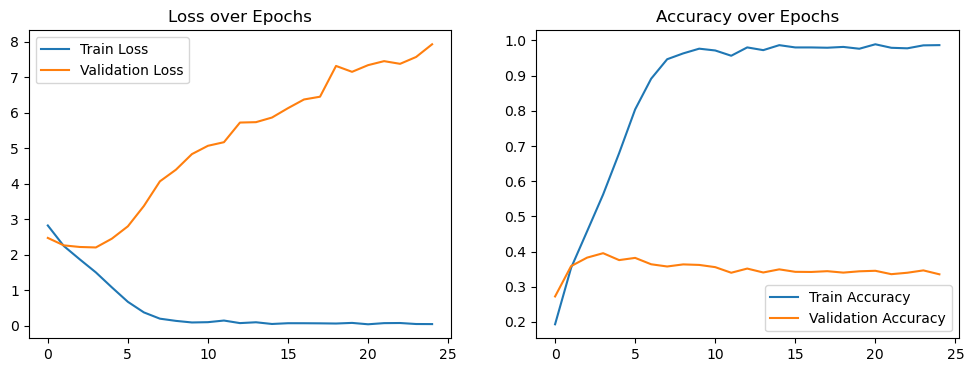

In [23]:
cnn_model = SimpleCNN()

device = torch.device("cuda" if torch.cuda.is_available() else "mps")
cnn_model = cnn_model.to(device)

cnn_criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=1e-3)

# Train CNN model
cnn_model, cnn_history = train_model(cnn_model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=25)

# Plot training history for CNN
plot_training_history(cnn_history)

#### 2.3.2 Dropout (6 marks)

> Implement dropout in your model 

> Provide graphs and comment on your choice of proportion used.

In [ ]:
# Your code here!
class CustomCNN(nn.Module):
    def __init__(self, dropout_rate=0.5):  # You can specify the dropout rate as desired, typically between 0.2 and 0.5
        super(CustomCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=1)
        
        # Dropout layer
        self.dropout = nn.Dropout(p=dropout_rate)
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 60 * 60, 400)  # Adjust this to match the feature map size before the fully connected layers
        self.fc2 = nn.Linear(400, 400)
        self.fc3 = nn.Linear(400, 200)
        
    def forward(self, x):
        # [conv-relu] x2 - pool
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        # Apply dropout after pooling
        x = self.dropout(x)
        
        # [conv-relu-pool] x2
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        
        # conv-relu-pool
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        
        # Apply dropout before entering the fully connected layers
        x = self.dropout(x)
        
        # Flatten the output for the fully connected layer
        x = x.view(x.size(0), -1)
        
        # [fc-dropout-relu] x2
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        # Last fully connected layer, no dropout here
        x = self.fc3(x)
        
        # Softmax is typically applied via the loss function, so we'll return the raw scores
        return x

# You can specify the dropout rate when creating the model instance
model = CustomCNN(dropout_rate=0.5)

In [33]:
class SimpleCNNDropout(nn.Module):
    def __init__(self, dropout_rate=0.5):  # Adding a dropout_rate parameter with a default of 0.5
        super(SimpleCNNDropout, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=dropout_rate)  # Dropout layer
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 30)

    def forward(self, x):
        x = self.maxpool(self.relu(self.conv1(x)))
        x = self.maxpool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 16 * 16)  # Flatten the output
        x = self.dropout(x)  # Apply dropout
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        return x

# Example of creating a model with a specific dropout rate
model = SimpleCNNDropout(dropout_rate=0.5)

Epoch 0/49 - Train Loss: 3.2641 - Train Acc: 0.0827 - Val Loss: 2.9779 - Val Acc: 0.2015
Epoch 1/49 - Train Loss: 2.9476 - Train Acc: 0.1677 - Val Loss: 2.6986 - Val Acc: 0.2552
Epoch 2/49 - Train Loss: 2.7623 - Train Acc: 0.2118 - Val Loss: 2.5633 - Val Acc: 0.2896
Epoch 3/49 - Train Loss: 2.6337 - Train Acc: 0.2452 - Val Loss: 2.4728 - Val Acc: 0.3115
Epoch 4/49 - Train Loss: 2.5250 - Train Acc: 0.2714 - Val Loss: 2.4163 - Val Acc: 0.3152
Epoch 5/49 - Train Loss: 2.4638 - Train Acc: 0.2873 - Val Loss: 2.3425 - Val Acc: 0.3378
Epoch 6/49 - Train Loss: 2.3907 - Train Acc: 0.3051 - Val Loss: 2.3261 - Val Acc: 0.3459
Epoch 7/49 - Train Loss: 2.3338 - Train Acc: 0.3211 - Val Loss: 2.2561 - Val Acc: 0.3619
Epoch 8/49 - Train Loss: 2.2614 - Train Acc: 0.3449 - Val Loss: 2.2123 - Val Acc: 0.3756
Epoch 9/49 - Train Loss: 2.2188 - Train Acc: 0.3497 - Val Loss: 2.1736 - Val Acc: 0.3844
Epoch 10/49 - Train Loss: 2.1532 - Train Acc: 0.3743 - Val Loss: 2.1593 - Val Acc: 0.3804
Epoch 11/49 - Train 

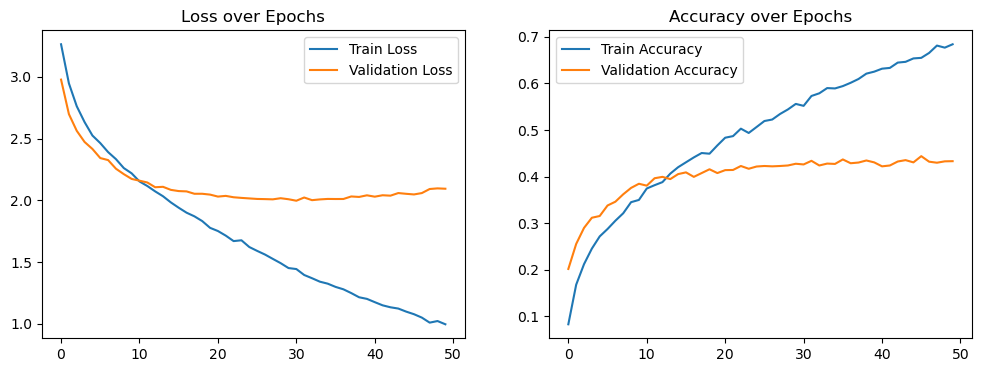

In [34]:
cnn_criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Train CNN model
model, cnn_history = train_model(model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=50)

# Plot training history for CNN
plot_training_history(cnn_history)

#### 2.3.3 Hyperparameter tuning (6 marks)

> Use learning rates [0.1, 0.001, 0.0001].

> Provide graphs each for loss and accuracy at three different learning rates in a single graph.

In [ ]:
cnn_model = SimpleCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "mps")
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.1)
# Train CNN model
cnn_model, cnn_history = train_model(cnn_model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=7)
# Plot training history for CNN
plot_training_history(cnn_history)



In [ ]:
cnn_model = SimpleCNN()
# Your graph
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.01)
# Train CNN model
cnn_model, cnn_history = train_model(cnn_model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=7)
# Plot training history for CNN
plot_training_history(cnn_history)

In [ ]:
cnn_model = SimpleCNN()
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.0001)
# Train CNN model
cnn_model, cnn_history = train_model(cnn_model, train_loader, val_loader, cnn_criterion, cnn_optimizer, num_epochs=7)
# Plot training history for CNN
plot_training_history(cnn_history)

### 3 Model testing [10 marks]
Online evaluation of your model performance on the test set. 

> Prepare the dataloader for the testset.

> Write evaluation code for writing predictions.

> Upload it to Kaggle submission page (6 marks)


#### 3.1 Test class and predictions (4 marks)

> Build a test class, prepare a test dataloader and generate predictions

Create a PyTorch ```Dataset``` for the unlabeled test data in the test_set folder of the Kaggle competition and generate predictions using your final model. Test data can be downloaded [here](https://www.kaggle.com/competitions/comp5623m-artificial-intelligence/data?select=test_set).

In [43]:
test_dataset = TinyImage30TestDataset(directory=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [45]:
import pandas as pd
import torch

# Let's assume you have a test DataLoader named `test_loader`
# And a model named `model` that's already trained and moved to the appropriate device

# Set the model to evaluation mode
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "mps")
# Initialize lists to store the test ids and predicted categories
test_ids = []
pred_categories = []

# Disable gradient computation
with torch.no_grad():
    for data in test_loader:
        # Assuming the dataset returns a tuple of images and ids
        images, ids = data
        images = images.to(device)

        # Get predictions
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Store results
        test_ids.extend(ids)
        pred_categories.extend(predicted.cpu().numpy().tolist())

# Create a DataFrame with the results
submission_df = pd.DataFrame({
    'Id': test_ids,
    'Category': pred_categories
})

# Ensure the file name is your student username as per the competition rules
submission_file_name = 'mm23ap.csv'

# Save the DataFrame to a CSV file
submission_df.to_csv(submission_file_name, index=False)

# Make sure to check the CSV file format and content before submission


#### 3.2 Prepare your submission and upload to Kaggle  (6 marks)

Save all test predictions to a CSV file and submit it to the private class Kaggle competition. **Please save your test CSV file submissions using your student username (the one with letters, e.g., ``sc15jb``, not the ID with only numbers)**, for example, `sc15jb.csv`. That will help us to identify your submissions.

The CSV file must contain only two columns: ‘Id’ and ‘Category’ (predicted class ID) as shown below:

```txt
Id,Category
28d0f5e9_373c.JPEG,2
bbe4895f_40bf.JPEG,18
```

The ‘Id’ column should include the name of the image. It is important to keep the same name as the one on the test set. Do not include any path, just the name of file (with extension). Your csv file must contain 1501 rows, one for each image on test set and 1 row for the headers. [To submit please click here.](https://www.kaggle.com/t/917fe52f6a3c4855880a24b34f26db07)

> You may submit multiple times. We will use your personal top entry for allocating marks for this [6 marks]. 


In [46]:
# Your code here! 
import pandas as pd
import torch

# Let's assume you have a test DataLoader named `test_loader`
# And a model named `model` that's already trained and moved to the appropriate device

# Set the model to evaluation mode
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "mps")
# Initialize lists to store the test ids and predicted categories
test_ids = []
pred_categories = []

# Disable gradient computation
with torch.no_grad():
    for data in test_loader:
        # Assuming the dataset returns a tuple of images and ids
        images, ids = data
        images = images.to(device)

        # Get predictions
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Store results
        test_ids.extend(ids)
        pred_categories.extend(predicted.cpu().numpy().tolist())

# Create a DataFrame with the results
submission_df = pd.DataFrame({
    'Id': test_ids,
    'Category': pred_categories
})

# Ensure the file name is your student username as per the competition rules
submission_file_name = 'mm23ap.csv'

# Save the DataFrame to a CSV file
submission_df.to_csv(submission_file_name, index=False)


### 4 Model Fine-tuning/transfer learning on CIFAR10 dataset  [16 marks]

Fine-tuning is a way of applying or utilizing transfer learning. It is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task. You can perform fine-tuning in following fashion:

- Train an entire model: Start training model from scratch (large dataset, more computation)

- Train some layers, freeze others: Lower layer features are general (problem independent) while higher layer features are specific (problem dependent – freeze)

- Freeze convolution base and train only last FC layers (small dataset and lower computation) 

> **Configuring your dataset**
   - Download your dataset using ``torchvision.datasets.CIFAR10`` [explained here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)
   - Split training dataset into training and validation set similar to above. *Note that the number of categories here is only 10*


In [ ]:
# Your code here! 

> Load pretrained AlexNet from PyTorch - use model copies to apply transfer learning in different configurations

In [ ]:
# Your code here! 

#### 4.1 Apply transfer learning with pretrained model weights (6 marks)


> Configuration 1: No frozen layers

In [ ]:
# Your model changes here - also print trainable parameters

#### 4.2 Fine-tuning model with frozen layers (6 marks)

> Configuration 2: Frozen base convolution blocks

In [ ]:
# Your changes here - also print trainable parameters

#### 4.3 Compare above configurations and comment on performances. (4 marks)

In [ ]:
# Your graphs here and please provide comment in markdown in another cell

### Part II: Image Captioning using RNN [30 marks]



### Motivation 

Through this part of assessment you will:

> 1. Understand the principles of text pre-processing and vocabulary building (provided).
> 2. Gain experience working with an image to text model.
> 3. Use and compare text similarity metrics for evaluating an image to text model, and understand evaluation challenges.

#### Dataset
This assessment will use a subset of the [COCO "Common Objects in Context" dataset](https://cocodataset.org/) for image caption generation. COCO contains 330K images, of 80 object categories, and at least five textual reference captions per image. Our subset consists of nearly 5070 of these images, each of which has five or more different descriptions of the salient entities and activities, and we will refer to it as COCO_5070.

To download the data:

> 1. **Images and annotations**: download the zipped file provided in the link here as [``COMP5625M_data_assessment_2.zip``](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/EWWzE-_AIrlOkvOKxH4rjIgBF_eUx8KDJMPKM2eHwCE0dg?e=DdX62H). 

``Info only:`` To understand more about the COCO dataset you can look at the [download page](https://cocodataset.org/#download). We have already provided you with the "2017 Train/Val annotations (241MB)" but our image subset consists of fewer images compared to orginial COCO dataset. So, no need to download anything from here! 

> 2. **Image meta data**: as our set is a subset of full COCO dataset, we have created a CSV file containing relevant meta data for our particular subset of images. You can download it also from Drive, "coco_subset_meta.csv" at the same link as 1.

#### Submission

You can either submit the same file or make a two separate .ipython notebook files zipped in the submission (please name as ``yourstudentusername_partI.ipynb`` and ``yourstudentusername_partII.ipynb``). 

**Final note:**

> **Please include in this notebook everything that you would like to be marked, including figures. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


The basic principle of our image-to-text model is as pictured in the diagram below, where an Encoder network encodes the input image as a feature vector by providing the outputs of the last fully-connected layer of a pre-trained CNN (we use [ResNet50](https://arxiv.org/abs/1512.03385)). This pretrained network has been trained on the complete ImageNet dataset and is thus able to recognise common objects. 

You can alternatively use the COCO trained pretrained weights from [PyTorch](https://pytorch.org/vision/stable/models.html). One way to do this is use the "FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1" but use e.g., "resnet_model = model.backbone.body". Alternatively, you can use the checkpoint from your previous coursework where you fine-tuned to COCO dataset. 

These features are then fed into a Decoder network along with the reference captions. As the image feature dimensions are large and sparse, the Decoder network includes a linear layer which downsizes them, followed by *a batch normalisation layer to speed up training*. Those resulting features, as well as the reference text captions, are then passed into a recurrent network (we will use an **RNNs** in this assessment). 

The reference captions used to compute loss are represented as numerical vectors via an **embedding layer** whose weights are learned during training.

<!-- ![Encoder Decoder](comp5625M_figure.jpg) -->

<div>
<center><img src="comp5625M_figure.jpg" width="1000"/></center>
</div>


### Instructions for creating vocabulary 

A helper function file ``helperDL.py`` is provided that includes all the functions that will do the following for you. You can easily import these functions in the exercise, most are already done for you!  

> 1. Extracting image features (a trained checkpoint is provided ``resnet50_caption.pt`` for you to download and use it for training your RNN)
> 2. Text preparation of training and validation data is provided

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'mps')
print('Using device:', device)

**Please refer to the submission section at the top of this notebook to prepare your submission.**


In [ ]:
resnet50 = models.resnet50(pretrained=True)
num_classes = 91  # The COCO dataset has 80 classes but the indices go up to 90
resnet50.fc = torch.nn.Linear(resnet50.fc.in_features, num_classes)

In [ ]:
# Load the feature map provided to you
features_map = torch.load('coco_features_'+(device.type)+'.pt', map_location=device)

#### 5 Train DecoderRNN [20 marks]

> 5.1 Design a RNN-based decoder (10 marks)

> 5.2 Train your model with precomputed features (10 Marks)

##### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).


In [ ]:
import json
import pandas as pd

with open('data/COMP5625M_data_assessment_2/coco/annotations2017/captions_train2017.json', 'r') as json_file:
    data = json.load(json_file)
    
df = pd.DataFrame.from_dict(data["annotations"])
df.head()

In [ ]:
coco_subset = pd.read_csv("data/COMP5625M_data_assessment_2/coco_subset_meta.csv")
new_data = pd.DataFrame( data['annotations'])
new_coco = coco_subset.rename(columns={'id':'image_id'})
new_coco.drop_duplicates('file_name',keep='first',inplace=True)

new_subset = new_data.sort_values(['image_id'], ascending=True)
# Get all the reference captions
new_file = pd.merge(new_coco,new_subset,how = 'inner', on = 'image_id')
new_file = new_file[['image_id','id','caption','file_name']]
new_file = new_file.sort_values(['image_id'], ascending = True)
new_file.head(10)

In [ ]:
# getting the clearn clean - e.g., converting all uppercases to lowercases
new_file["clean_caption"] = ""
from helperDL import gen_clean_captions_df
new_file = gen_clean_captions_df(new_file)
new_file.head(10)

In [ ]:
##### Spilt your training, validation and test dataset with indexes to each set
from helperDL import split_ids
train_id, valid_id, test_id = split_ids(new_file['image_id'].unique())
print("training:{}, validation:{}, test:{}".format(len(train_id), len(valid_id), len(test_id)))

In [ ]:
train_set = new_file.loc[new_file['image_id'].isin(train_id)]
valid_set = new_file.loc[new_file['image_id'].isin(valid_id)]
test_set = new_file.loc[new_file['image_id'].isin(test_id)]

In [ ]:
class Vocabulary(object):
    """ Simple vocabulary wrapper which maps every unique word to an integer ID. """
    def __init__(self):
        # intially, set both the IDs and words to dictionaries with special tokens
        self.word2idx = {'<pad>': 0, '<unk>': 1, '<end>': 2}
        self.idx2word = {0: '<pad>', 1: '<unk>', 2: '<end>'}
        self.idx = 3

    def add_word(self, word):
        # if the word does not already exist in the dictionary, add it
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            # increment the ID for the next word
            self.idx += 1

    def __call__(self, word):
        # if we try to access a word not in the dictionary, return the id for <unk>
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [ ]:
### build vocabulariy for each set - train, val and test 
# you will be using to create dataloaders
from helperDL import build_vocab

# create a vocab instance
vocab = Vocabulary()
vocab_train = build_vocab(train_id, new_file, vocab)
vocab_valid = build_vocab(valid_id, new_file, vocab)
vocab_test = build_vocab(test_id, new_file, vocab)

vocab = vocab_train # using only training samples as vocabulary as instructed above
print("Total vocabulary size: {}".format(len(vocab_train)))


In [ ]:
# They can also join the train and valid captions but they will need to run vocabulary after concatenation
import numpy as np
vocab = build_vocab(np.concatenate((train_id, valid_id), axis=0), new_file, vocab) #---> overrighting
len(vocab)

Instantiate a ```DataLoader``` for your image feature and caption dataset. ``helperDL.py`` file includes all the required functions

We need to overwrite the default PyTorch collate_fn() because our 
ground truth captions are sequential data of varying lengths. The default
collate_fn() does not support merging the captions with padding.

You can read more about it here:
https://pytorch.org/docs/stable/data.html#dataloader-collate-fn. 


In [ ]:
from helperDL import EncoderCNN  
model = EncoderCNN() 
print(model)

In [ ]:
''' Load the saved image feature maps and trained model ("provided to you") '''

# ---> your entry here (make sure that the path is correct)
features = torch.load("coco_features.pt")

# also load the model ckpt and udate the model state dict of the base model
# ---> your entry here (make sure that the path is correct)
checkpoint = torch.load("ckpt file here") 
model.load_state_dict(checkpoint['model_state_dict'])

In [ ]:
##### Preparing the train, val and test dataloaders
from helperDL import COCO_Features
from helperDL import caption_collate_fn


# Create a dataloader for train
dataset_train = COCO_Features(
    df=train_set,
    vocab=vocab,
    features=features_map,
)

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

# Create a dataloader for valid
dataset_valid = COCO_Features(
    df=valid_set,
    vocab=vocab,
    features=features_map,
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

In [ ]:
# say this is as below 
# --> Please change these numbers as required. 
# --> Please comment on changes that you do.
EMBED_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 1
LR = 0.001
NUM_EPOCHS = 5
LOG_STEP = 10
MAX_SEQ_LEN = 37

#### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=256, hidden_size=512, num_layers=1, max_seq_length=47):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()
        # we want a specific output size, which is the size of our embedding, so
        # we feed our extracted features from the last fc layer (dimensions 1 x 2048)
        # into a Linear layer to resize
        # your code
        
        # batch normalisation helps to speed up training
        # your code


        # your code for embedding layer
   

        # your code for RNN
   

        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length
        

    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        im_features = self.resize(features)
        im_features = self.bn(im_features)
        
        # compute your feature embeddings
        # your code

    
        # pack_padded_sequence returns a PackedSequence object, which contains two items: 
        # the packed data (data cut off at its true length and flattened into one list), and 
        # the batch_sizes, or the number of elements at each sequence step in the batch.
        # For instance, given data [a, b, c] and [x] the PackedSequence would contain data 
        # [a, x, b, c] with batch_sizes=[2,1,1].

        # your code [hint: use pack_padded_sequence]
    


        outputs = self.linear() #hint: use a hidden layers in parenthesis
        return outputs
    
    
    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []

        inputs = self.bn(self.resize(features)).unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.rnn(inputs, states)  # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))   # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)               # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)              # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)       # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids


In [ ]:
# instantiate decoder
decoder = DecoderRNN(len(vocab), embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS).to(device)

##### 5.2 Train your model with precomputed features (10 marks)

Train the decoder by passing the features, reference captions, and targets to the decoder, then computing loss based on the outputs and the targets. Note that when passing the targets and model outputs to the loss function, the targets will also need to be formatted using ```pack_padded_sequence()```.

We recommend a batch size of around 64 (though feel free to adjust as necessary for your hardware).

**We strongly recommend saving a checkpoint of your trained model after training so you don't need to re-train multiple times.**

Display a graph of training and validation loss over epochs to justify your stopping point.

In [ ]:

# loss and optimizer here
# your code here --->



# train the models
total_step = len(train_loader)
total_step_v = len(valid_loader)
stats = np.zeros((NUM_EPOCHS,2))
print(stats.shape)
total_loss = 0
for epoch in range(NUM_EPOCHS):
    for i, (features_, captions_, lengths_) in enumerate(train_loader):
        # your code here --->









  
        total_loss += loss.item()

        # print stats
        if i % LOG_STEP == 0:
            print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i}/{total_step}], Loss: {loss.item():.4f}")
    
    stats[epoch,0] = round(total_loss/total_step,3)
    total_loss = 0
    decoder.eval()
    with torch.no_grad():  
        for i, (features_, captions_, lengths_) in enumerate(valid_loader):
            # your code here --->



            
    stats[epoch,1] = round(total_loss/total_step_v,3)
    total_loss = 0
    # print stats
    print("="*30)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Train_Loss: {stats[epoch,0]}, Valid_Loss: {stats[epoch,1]}")
    print("="*30)
    decoder.train()

In [ ]:
fig = plt.figure()

plt.plot(stats[:,0], 'r', label = 'training', )
plt.plot(stats[:,1], 'g', label = 'validation' )
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(f"COCO dataset- train vocab only #vocab={len(vocab)} - 5 epochs")
fig.savefig("coco_train_vocab_only.png")
plt.show()

In [ ]:
# save model after training
decoder_ckpt = torch.save(decoder, "coco_subset_assessment_decoder.ckpt")

### 6 Test prediction and evaluation [10 marks] 

#### 6.1 Generate predictions on test data (4 marks)

Display 4 sample test images containing different objects, along with your model’s generated captions and all the reference captions for each.

> Remember that everything **displayed** in the submitted notebook and .html file will be marked, so be sure to run all relevant cells.

In [ ]:
data_transform = transforms.Compose([ 
    transforms.Resize(224),     
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),   # using ImageNet norms
                         (0.229, 0.224, 0.225))])

dataset_test = COCOImagesDataset(
    df=test_set,
    transform=data_transform,
)
test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=32,
    shuffle=False,
    num_workers=0)

In [ ]:
model.eval()
decoder.eval() # generate caption, eval mode to not influence batchnormncoder.eval()

In [ ]:
# getting functions from helperDL.py
from helperDL import timshow
from helperDL import decode_caption

In [ ]:
IMAGES_TO_SHOW = 4
idx = 0
with torch.no_grad():
    for i, (image,filename) in enumerate(test_loader):
        
        # your code here --->







        
        print(f"GENERATED: \n")
        print("REFERENCES:")

        print("===================================\n")


        timshow(image[0].cpu())
        idx +=1
        if idx == IMAGES_TO_SHOW:
            break

#### 6.2 Caption evaluation using cosine similarity (6 marks)

The cosine similarity measures the cosine of the angle between two vectors in n-dimensional space. The smaller the angle, the greater the similarity.

To use the cosine similarity to measure the similarity between the generated caption and the reference captions: 

* Find the embedding vector of each word in the caption 
* Compute the average vector for each caption 
* Compute the cosine similarity score between the average vector of the generated caption and average vector of each reference caption
* Compute the average of these scores 

Calculate the cosine similarity using the model's predictions over the whole test set. 

Display a histogram of the distribution of scores over the test set.

In [ ]:
# your code here

##### Thank you for completing the assessment - if you have any question, please ask on teams channel or attend lab sessions on Tuesdays and Wednesdays.